In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("df_credit_clean2.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213288 entries, 0 to 213287
Data columns (total 36 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     213288 non-null  int64  
 1   asset_cost                           213288 non-null  int64  
 2   ltv                                  213288 non-null  float64
 3   manufacturer_id                      213288 non-null  int64  
 4   DisbursalDate                        213288 non-null  object 
 5   MobileNo_Avl_Flag                    213288 non-null  int64  
 6   Aadhar_flag                          213288 non-null  int64  
 7   PAN_flag                             213288 non-null  int64  
 8   VoterID_flag                         213288 non-null  int64  
 9   Driving_flag                         213288 non-null  int64  
 10  Passport_flag                        213288 non-null  int64  
 11  PERFORM_CNS.S

In [4]:
df

,disbursed_amount,asset_cost,ltv,manufacturer_id,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,age,emp_salaried,emp_selfemployed
0,50578,58400,89.55,45,2018-08-03,1,1,0,0,0,0,0,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,1,0
1,47145,65550,73.23,45,2018-09-26,1,1,0,0,0,0,598,I,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,34,0,1
2,53278,61360,89.63,45,2018-08-01,1,1,0,0,0,0,0,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,1
3,57513,66113,88.48,45,2018-10-26,1,1,0,0,0,0,305,L,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,26,0,1
4,52378,60300,88.39,45,2018-09-26,1,1,0,0,0,0,0,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,42,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213283,63213,105405,60.72,48,2018-10-26,1,0,0,1,0,0,735,D,4,3,0,390443,416133,416133,0,0,0,0,0,0,4084,0,0,0,21,39,0,0,31,1,0
213284,73651,100600,74.95,51,2018-10-23,1,0,0,1,0,0,825,A,1,0,0,0,0,0,0,0,0,0,0,0,1565,0,0,0,6,6,0,0,31,0,1
213285,33484,71212,48.45,86,2018-10-24,1,1,0,0,0,0,0,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,1,0
213286,34259,73286,49.10,86,2018-09-29,1,1,0,0,0,0,0,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,1,0


# 1. EDA

## 1.1 Disbursal date

In [5]:
df["DisbursalDate"] = pd.to_datetime(df["DisbursalDate"])

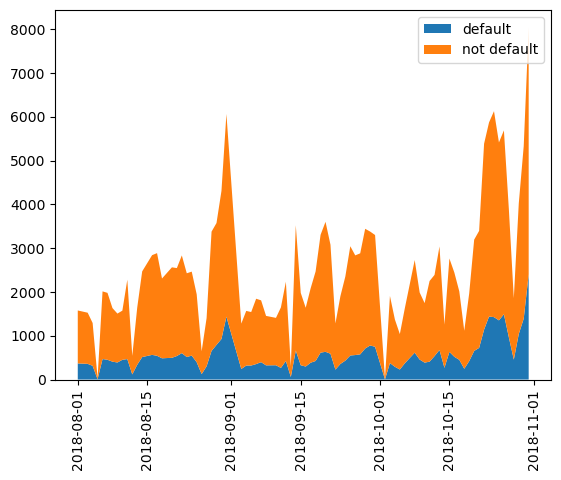

In [6]:
fig, ax = plt.subplots()
data_nond = df[df["loan_default"] == 0].groupby("DisbursalDate")["loan_default"].count()
data_d = df[df["loan_default"] == 1].groupby("DisbursalDate")["loan_default"].count()
ax.stackplot(data_d.index, data_d.values, data_nond.values, labels=['default','not default'])
plt.xticks(rotation = 90)

ax.legend()

## 1.2 Flag features

In [7]:
def plot_by_target_flag(varname):
    groupby_target = df.groupby('loan_default')[varname].value_counts(normalize = True)
    fig = plt.subplots(figsize =(12, 10))
    index = groupby_target[0].index
    barWidth = 0.3
    value_0 = groupby_target[0].values  # cac gtri y
    value_1 = groupby_target[1].values
    # Set position of bar on X axis
    br1 = np.arange(len(value_0))
    br2 = [x + barWidth for x in br1]

    # Make the plot
    plt.bar(br1, value_0 * 100, color ='#4c7ca4', width = barWidth, edgecolor ='grey', label ='Not default')
    plt.bar(br2, value_1 * 100, color ='#f28e2b', width = barWidth, edgecolor ='grey', label ='Default')
    # Xoa vach chia diem
    plt.tick_params(left = False, bottom = False)
    # Adding Xticks
    plt.title('Ratio of default on ' + varname, fontweight ='bold', fontsize = 15, color = 'green')
    plt.xlabel(varname, fontweight ='bold', fontsize = 15)
    plt.ylabel('count in %', fontweight ='bold', fontsize = 15)

    plt.xticks([r + barWidth - 0.15 for r in range(len(value_0))],index)
    plt.legend()
    plt.show()

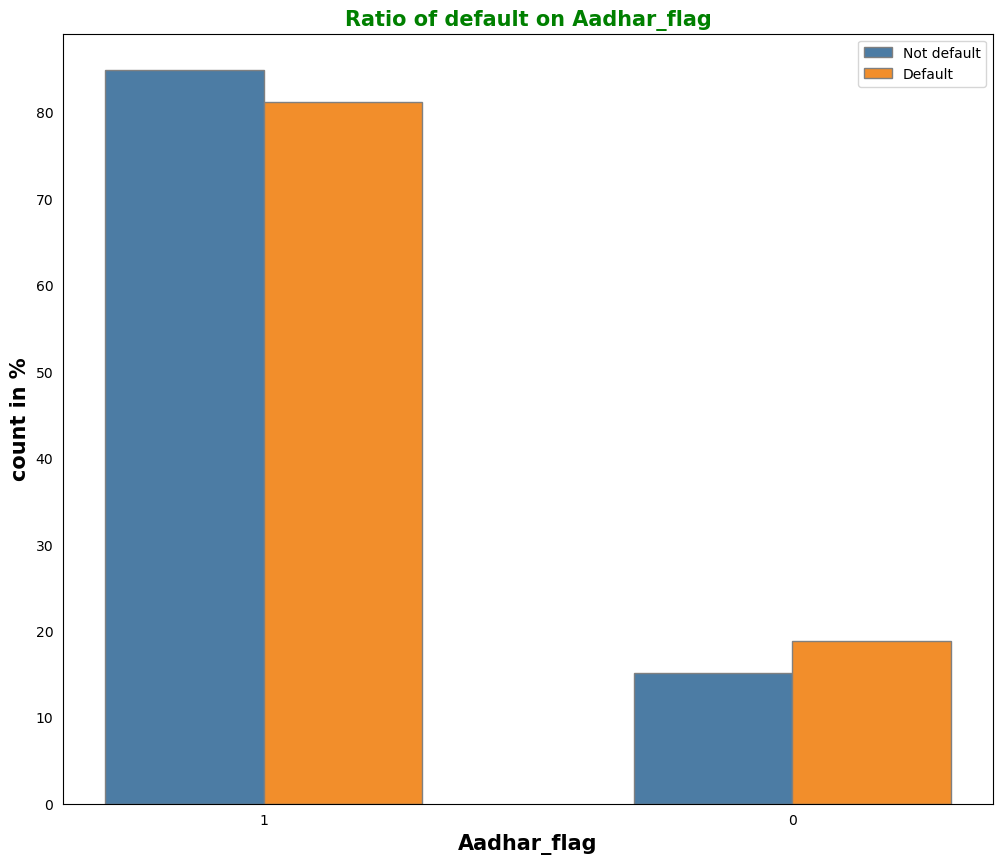

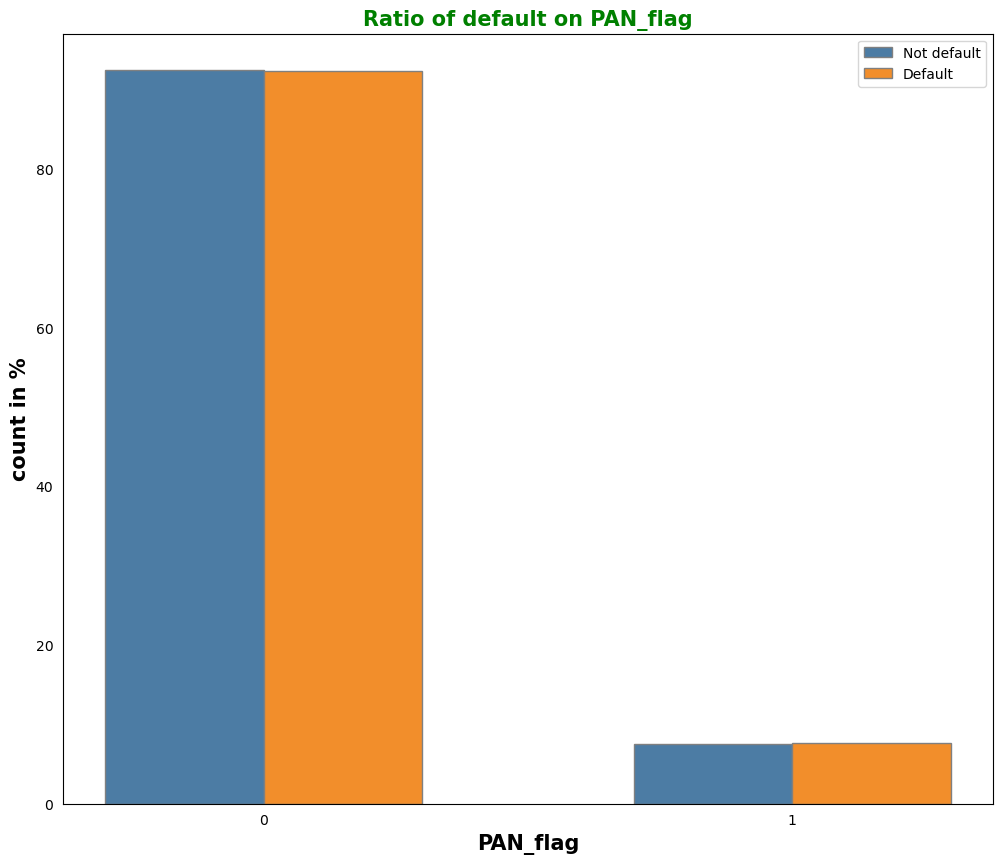

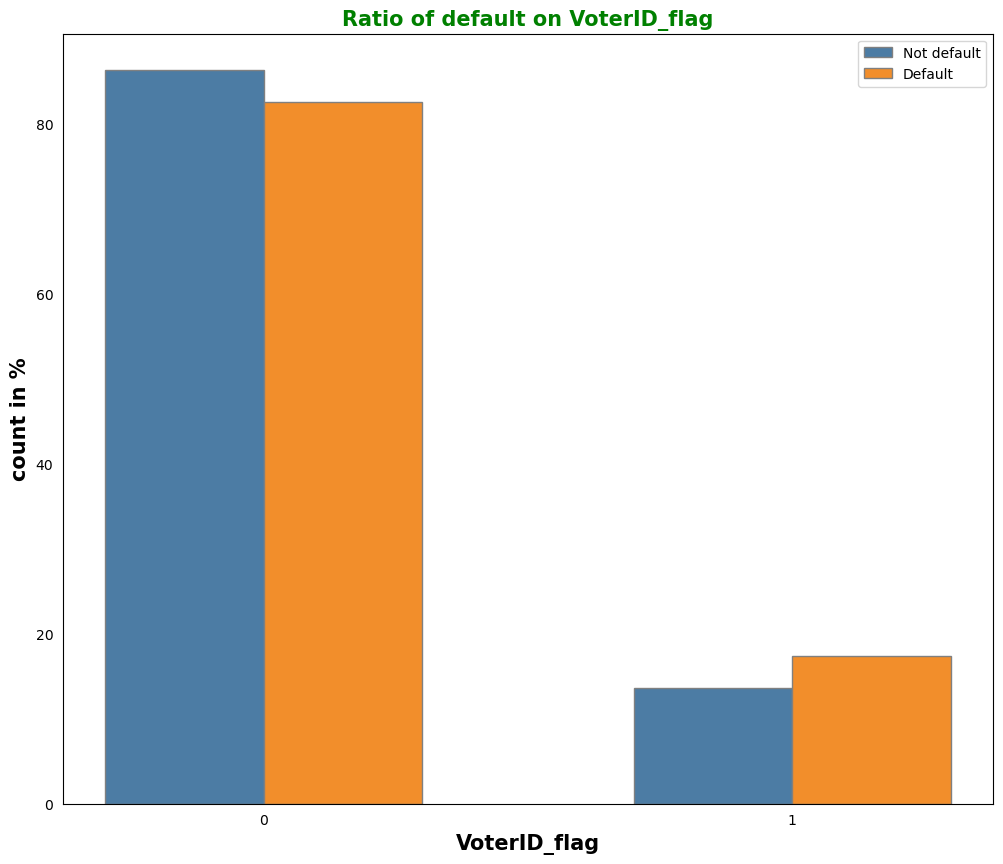

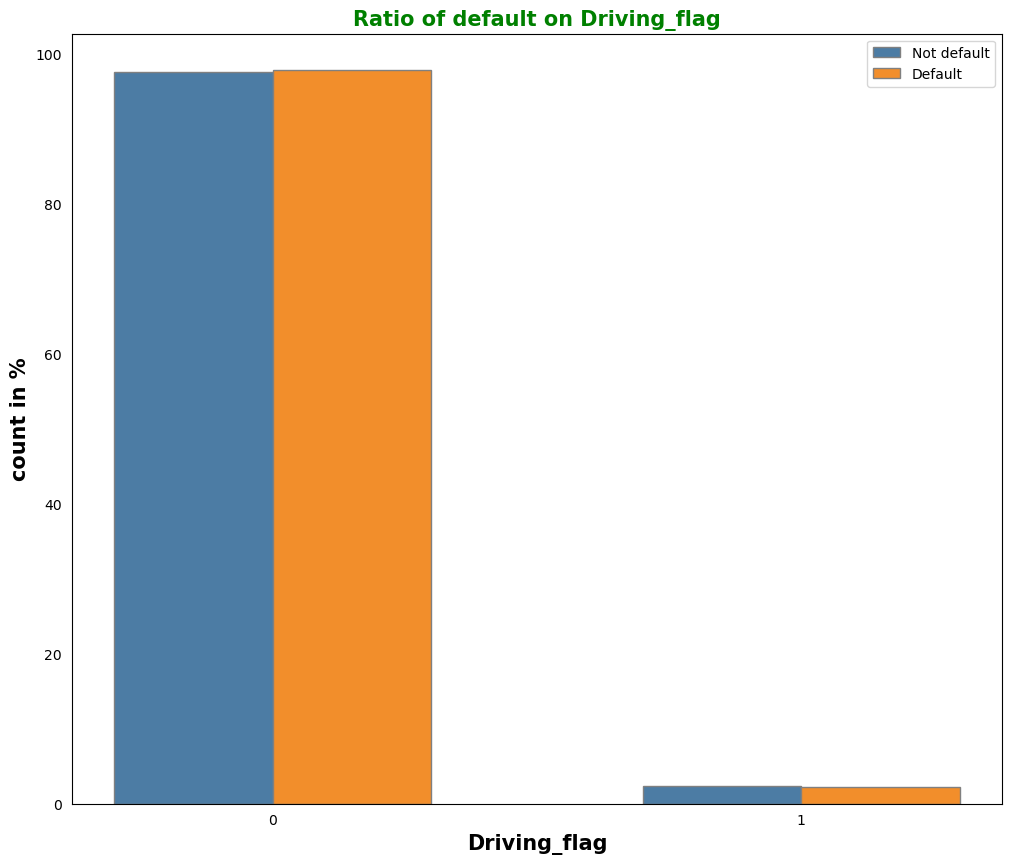

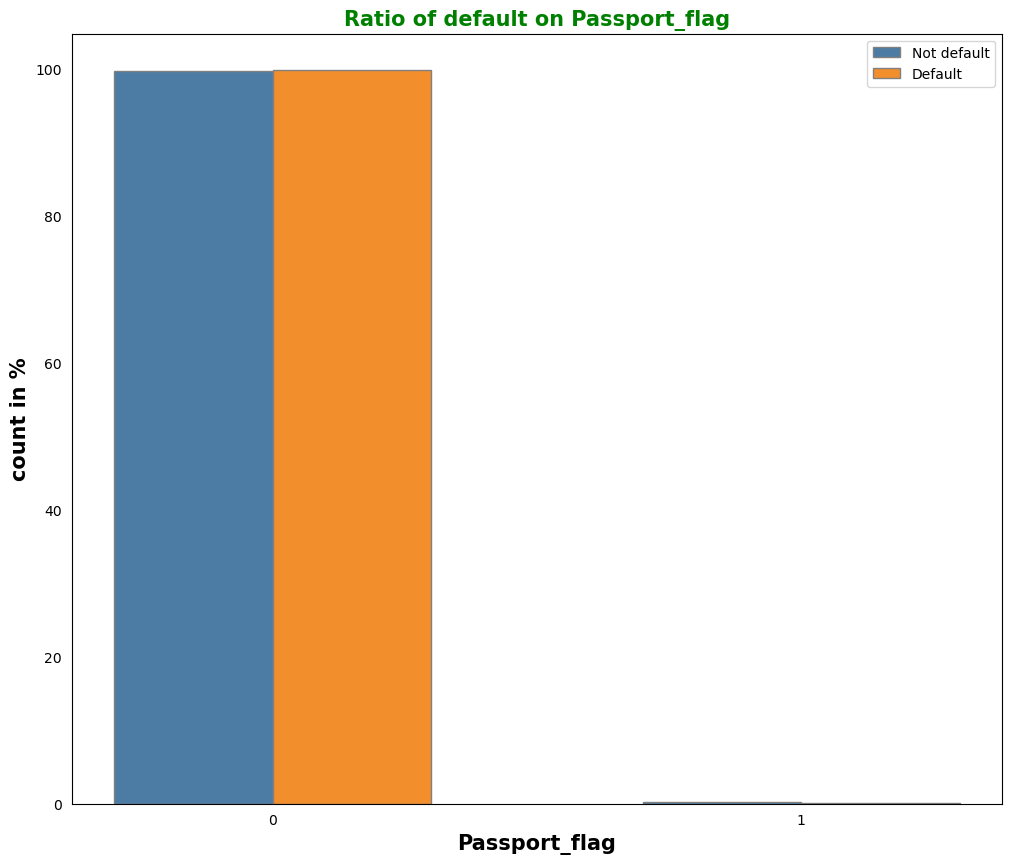

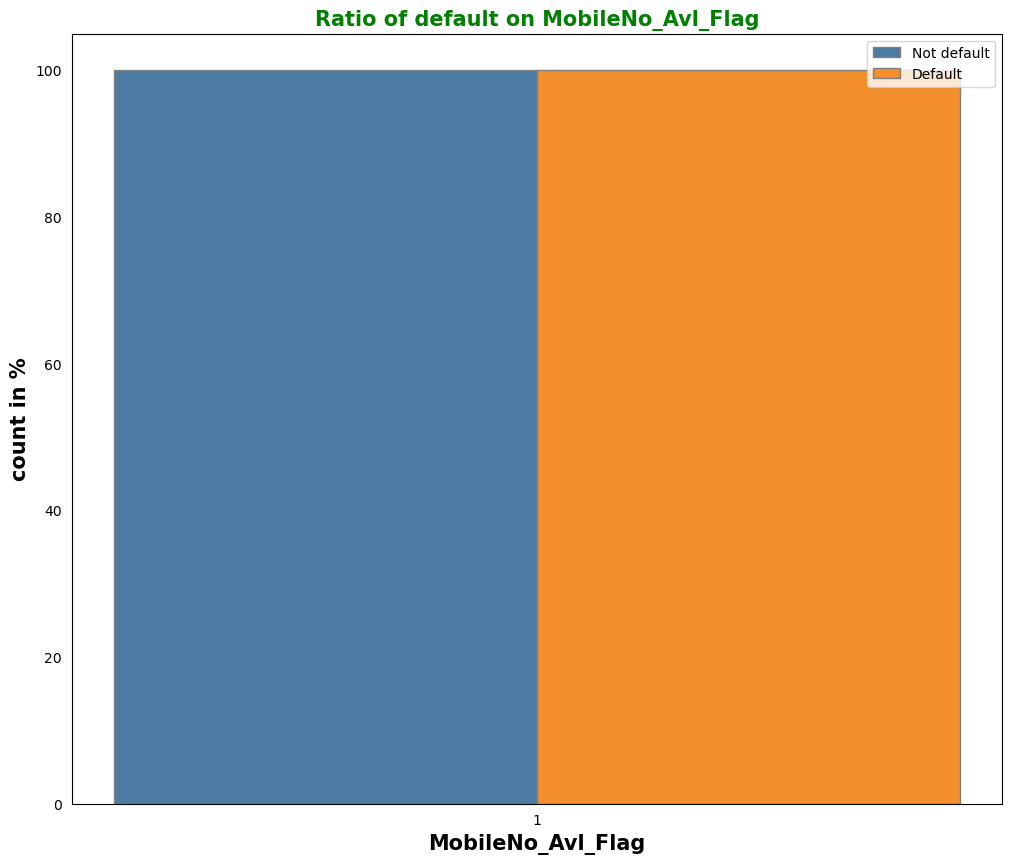

In [8]:
for i in df.columns[df.columns.str.endswith("_flag")]:
    plot_by_target_flag(i)
for i in df.columns[df.columns.str.endswith("_Flag")]:
    plot_by_target_flag(i)

Drop features MobileNo_Avl_Flag, Passport flag, Driving flag, PAN_flag because of the similar distribution between default and not default group and some of them are skewed

In [9]:
df.drop(["PAN_flag", 'Passport_flag', "MobileNo_Avl_Flag", "Driving_flag"], axis = 1, inplace=True)

In [10]:
df.groupby(df["DisbursalDate"].dt.month_name())["loan_default"].value_counts(normalize=True)

DisbursalDate  loan_default
August         0               0.782151
               1               0.217849
October        0               0.762474
               1               0.237526
September      0               0.805656
               1               0.194344
Name: loan_default, dtype: float64

In [11]:
df["DisbursalDate"] = df["DisbursalDate"].dt.month

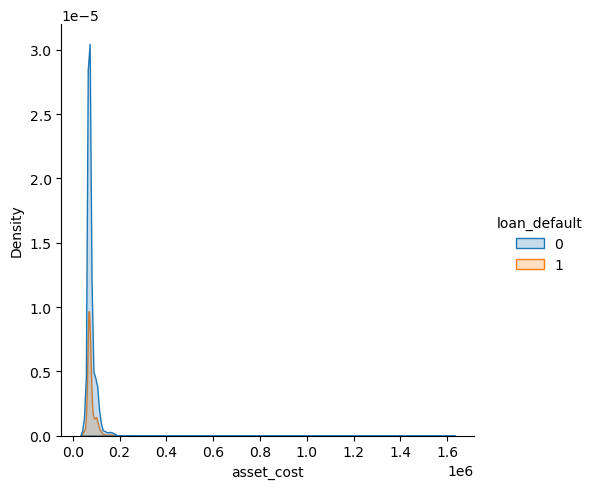

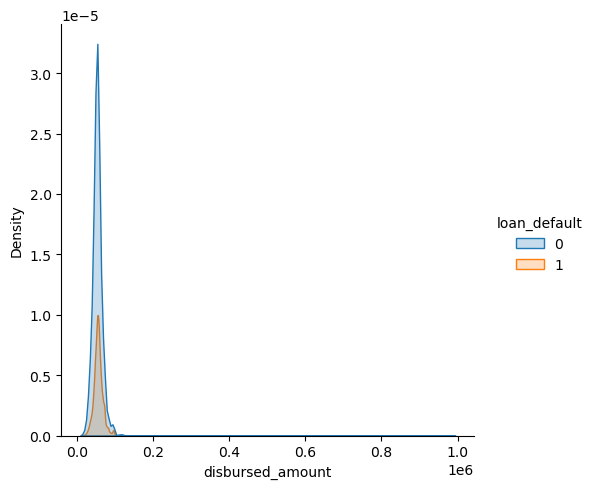

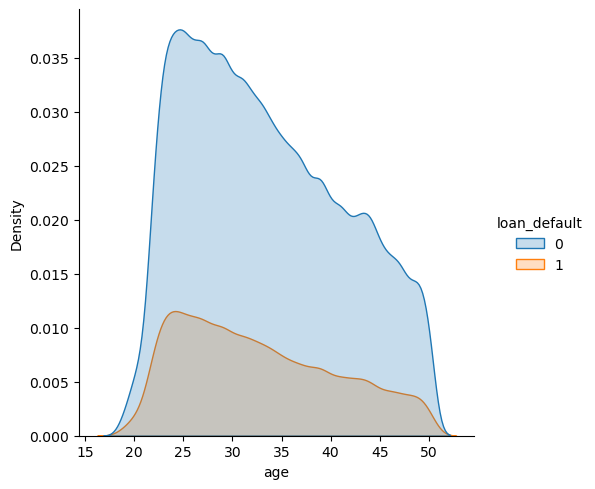

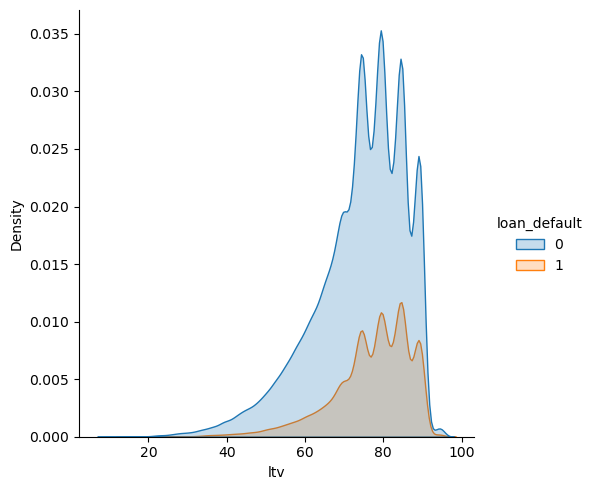

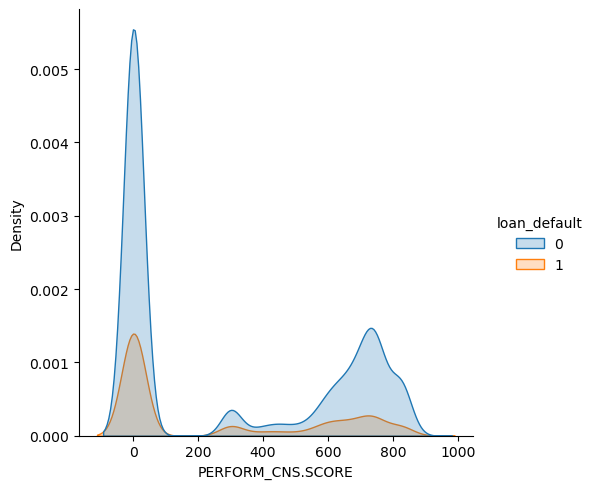

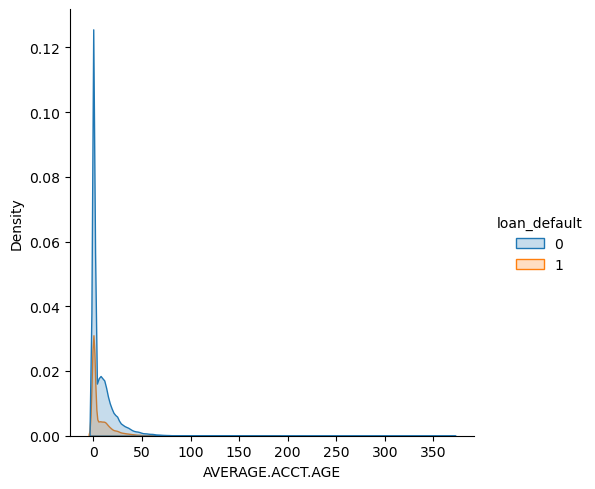

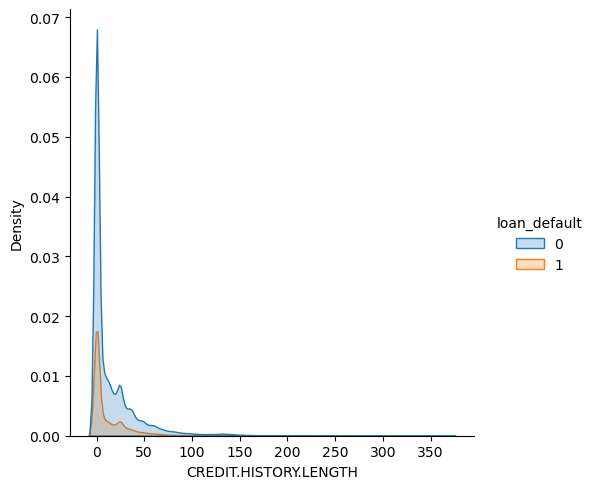

In [12]:
for i in ["asset_cost", "disbursed_amount", "age", "ltv", "PERFORM_CNS.SCORE", "AVERAGE.ACCT.AGE", "CREDIT.HISTORY.LENGTH"]:
    data = df[[i, "loan_default"]]
    sns.displot(data=data, x=i, hue='loan_default', kind="kde", fill = True)
    plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x231d9225670>,
 'caps': [<matplotlib.lines.Line2D at 0x231d92254c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x231d9225910>],
 'medians': [<matplotlib.lines.Line2D at 0x231d923f250>],
 'fliers': [<matplotlib.lines.Line2D at 0x231d923f0a0>],
 'means': []}

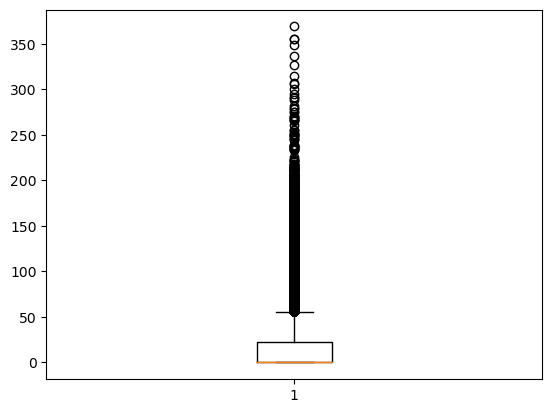

In [13]:
plt.boxplot(df["CREDIT.HISTORY.LENGTH"])

In [14]:
# number of zeros in this column account for more than half of the values, we can categorize this column into whether it is a new account or not (0 means no credit history or new account)
temp = df.copy()
temp["CREDIT.HISTORY.LENGTH"] = pd.cut(df["CREDIT.HISTORY.LENGTH"], [-1, 0, 400])
temp["CREDIT.HISTORY.LENGTH"].value_counts()

(-1, 0]     111194
(0, 400]    102094
Name: CREDIT.HISTORY.LENGTH, dtype: int64

In [15]:
temp.groupby("CREDIT.HISTORY.LENGTH")["loan_default"].value_counts(normalize=True)

CREDIT.HISTORY.LENGTH  loan_default
(-1, 0]                0               0.767586
                       1               0.232414
(0, 400]               0               0.794777
                       1               0.205223
Name: loan_default, dtype: float64

In [16]:
(df["CREDIT.HISTORY.LENGTH"] == 0).sum()

111194

In [17]:
df["CREDIT.HISTORY.LENGTH"]

0          0
1         23
2          0
3         15
4          0
          ..
213283    39
213284     6
213285     0
213286     0
213287     0
Name: CREDIT.HISTORY.LENGTH, Length: 213288, dtype: int64

In [18]:
df["CREDIT.HISTORY.LENGTH"].max()

369

In [19]:
def remove_outliers_iqr(df, column):
    q75, q25 = np.percentile(df[column], [75 ,25])
    IQR = q75 - q25
    fence_low = q25 - 1.5 * IQR 
    fence_high = q75 + 1.5 * IQR
    df_out = df.loc[(df[column] > fence_low) & (df[column] < fence_high)]
    removed = df.shape[0] - df_out.shape[0] 
    print("rows removed:" + str(removed))
    return df_out

In [20]:
def replace_outliers_q3(df, column):
    q75, q25 = np.percentile(df[column], [75 ,25])
    IQR = q75 - q25
    fence_low = q25 - 1.5 * IQR 
    fence_high = q75 + 1.5 * IQR
    df_out = df.copy()
    df_out[(df_out[column] > fence_high)][column] = q75
    removed = df.shape[0] - df_out.shape[0] 
    print("rows removed:" + str(removed))
    return df_out

In [21]:
df_out = df.copy()
q75, q25 = np.percentile(df["AVERAGE.ACCT.AGE"], [75 ,25])
IQR = q75 - q25
fence_high = q75 + 1.5 * IQR
df_out[(df_out["AVERAGE.ACCT.AGE"] > fence_high)]["AVERAGE.ACCT.AGE"] = q75

C:\Users\DELL24H.VN\AppData\Local\Temp\ipykernel_12496\3939744872.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out[(df_out["AVERAGE.ACCT.AGE"] > fence_high)]["AVERAGE.ACCT.AGE"] = q75


In [22]:
df_out[(df_out["AVERAGE.ACCT.AGE"] > fence_high)]["AVERAGE.ACCT.AGE"]

8         56
13        47
20        33
26        37
46        34
          ..
213249    55
213252    57
213269    82
213272    54
213276    36
Name: AVERAGE.ACCT.AGE, Length: 14368, dtype: int64

C:\Users\DELL24H.VN\AppData\Local\Temp\ipykernel_12496\3270708906.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out[(df_out[column] > fence_high)][column] = q75


rows removed:0


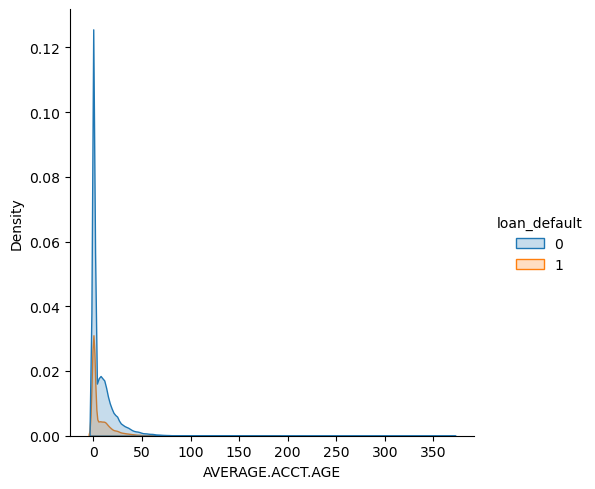

C:\Users\DELL24H.VN\AppData\Local\Temp\ipykernel_12496\3270708906.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out[(df_out[column] > fence_high)][column] = q75


rows removed:0


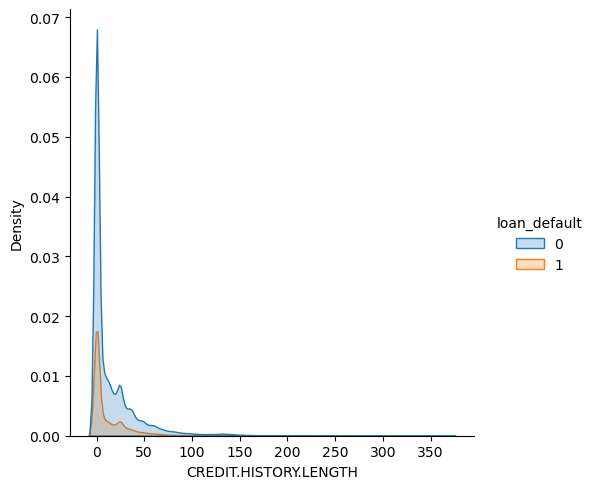

In [23]:
temp = df.copy()
for i in ["AVERAGE.ACCT.AGE", "CREDIT.HISTORY.LENGTH"]:
    data = replace_outliers_q3(temp, i)
    sns.displot(data=data, x=i, hue='loan_default', kind="kde", fill = True)
    temp = data
    plt.show()

In [24]:
df["CREDIT.HISTORY.LENGTH"].value_counts()

0      111194
6        4557
25       4334
7        3840
24       3467
        ...  
292         1
271         1
300         1
307         1
295         1
Name: CREDIT.HISTORY.LENGTH, Length: 261, dtype: int64

In [25]:
temp.shape # if impute all outlier with iqr method, we would lose 32% of the data

(213288, 32)

In [26]:
df.shape

(213288, 32)

In [27]:
df[(df["CREDIT.HISTORY.LENGTH"] > 150) & (df["AVERAGE.ACCT.AGE"] > 100)]

,disbursed_amount,asset_cost,ltv,manufacturer_id,DisbursalDate,Aadhar_flag,VoterID_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,age,emp_salaried,emp_selfemployed
484,49803,66683,75.73,86,10,1,0,824,A,2,2,0,64,23111,3598,0,0,0,0,0,0,0,0,0,0,118,158,0,0,49,0,1
5085,72717,101699,73.65,51,9,1,0,779,B,14,7,2,43447,223867,120249,0,0,0,0,0,0,0,0,0,0,105,152,0,0,39,0,1
6455,60213,80571,75.71,86,9,1,0,583,I,1,1,0,1461423,1500000,1500000,0,0,0,0,0,0,0,0,0,0,166,166,0,0,46,0,1
12373,39694,157757,26.62,67,8,1,0,372,K,1,1,1,1360,46400,46400,0,0,0,0,0,0,0,0,0,0,164,164,0,0,36,0,1
13893,82286,113988,73.69,51,10,0,1,300,M,1,1,1,32404,32404,32404,0,0,0,0,0,0,0,0,0,0,157,157,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205867,68069,87186,79.14,86,10,1,0,300,M,1,1,0,47975,250000,250000,0,0,0,0,0,0,3055,0,0,0,151,151,3,0,39,0,1
206718,49803,73767,69.14,86,9,1,0,0,N,0,0,0,0,0,0,1,1,0,0,160000,160000,0,1855,0,0,188,188,0,1,45,0,1
208140,57239,73980,79.72,86,10,1,0,16,N,1,1,0,0,31165,31165,0,0,0,0,0,0,0,0,0,0,161,161,0,0,37,0,1
209265,57763,67250,87.73,45,10,1,0,723,D,1,1,0,982823,1308000,1308000,0,0,0,0,0,0,0,0,0,0,160,160,0,0,44,0,1


Checking distribution of continous features based on target column, no data drift detected. a lot of features is right-skewed, we can perform some transformation

Maximum number of customers are applying for loan for the first time, which explains why all the above columns have so many zero values. Also, there are many notable outliers, which makes the problem more complicated.

# 3. Feature selection

<AxesSubplot:>

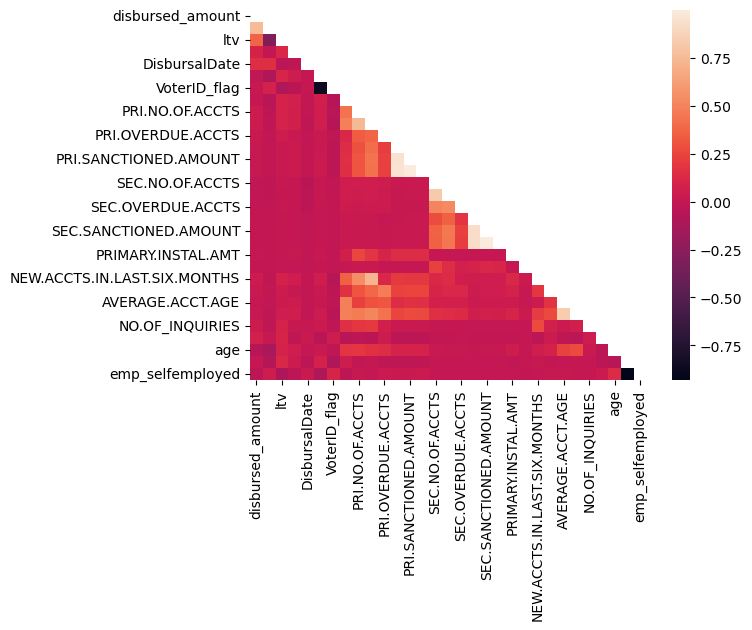

In [28]:
corrdf = df.corr()
matrix = np.triu(corrdf)
sns.heatmap(corrdf, mask=matrix)

In [29]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']])
df["PERFORM_CNS.SCORE.DESCRIPTION"] = oe.fit_transform(df[["PERFORM_CNS.SCORE.DESCRIPTION"]])

In [30]:
df

,disbursed_amount,asset_cost,ltv,manufacturer_id,DisbursalDate,Aadhar_flag,VoterID_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,age,emp_salaried,emp_selfemployed
0,50578,58400,89.55,45,8,1,0,0,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,1,0
1,47145,65550,73.23,45,9,1,0,598,8.0,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,34,0,1
2,53278,61360,89.63,45,8,1,0,0,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,1
3,57513,66113,88.48,45,10,1,0,305,11.0,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,26,0,1
4,52378,60300,88.39,45,9,1,0,0,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,42,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213283,63213,105405,60.72,48,10,0,1,735,3.0,4,3,0,390443,416133,416133,0,0,0,0,0,0,4084,0,0,0,21,39,0,0,31,1,0
213284,73651,100600,74.95,51,10,0,1,825,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1565,0,0,0,6,6,0,0,31,0,1
213285,33484,71212,48.45,86,10,1,0,0,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,1,0
213286,34259,73286,49.10,86,9,1,0,0,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,1,0


In [31]:
sorted(df["PERFORM_CNS.SCORE.DESCRIPTION"].unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]

In [32]:
sorted(df["PERFORM_CNS.SCORE.DESCRIPTION"].unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]

In [33]:
def find_high_corr_pair(df): # finding highly correlated pairs in a dataframe
    corr_matrix = df.corr()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    temp = []
    for col in upper.columns:
        for ind in upper.index:
            if upper.loc[ind, col] > 0.90:
                temp.append((col, ind))
    return temp # return a list of tuples with highly correlated pair

find_high_corr_pair(df)

C:\Users\DELL24H.VN\AppData\Local\Temp\ipykernel_12496\2015816481.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


[('PRI.SANCTIONED.AMOUNT', 'PRI.CURRENT.BALANCE'),
 ('PRI.DISBURSED.AMOUNT', 'PRI.CURRENT.BALANCE'),
 ('PRI.DISBURSED.AMOUNT', 'PRI.SANCTIONED.AMOUNT'),
 ('SEC.SANCTIONED.AMOUNT', 'SEC.CURRENT.BALANCE'),
 ('SEC.DISBURSED.AMOUNT', 'SEC.CURRENT.BALANCE'),
 ('SEC.DISBURSED.AMOUNT', 'SEC.SANCTIONED.AMOUNT')]

In [34]:
df['Total Current Balance'] = df['PRI.CURRENT.BALANCE'] + df['SEC.CURRENT.BALANCE']
df['Total Sanctioned Amount'] = df['PRI.SANCTIONED.AMOUNT'] + df['SEC.SANCTIONED.AMOUNT']
df['Total Disbursed Amount'] = df['PRI.DISBURSED.AMOUNT'] + df['SEC.DISBURSED.AMOUNT']
df.drop(['PRI.DISBURSED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'SEC.SANCTIONED.AMOUNT'], axis = 1, inplace=True)

In [35]:

find_high_corr_pair(df)

C:\Users\DELL24H.VN\AppData\Local\Temp\ipykernel_12496\2015816481.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


[('Total Sanctioned Amount', 'Total Current Balance'),
 ('Total Disbursed Amount', 'Total Current Balance'),
 ('Total Disbursed Amount', 'Total Sanctioned Amount')]

In [36]:
numerical=['AVERAGE.ACCT.AGE',
 'CREDIT.HISTORY.LENGTH',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES',
 'PERFORM_CNS.SCORE',
 'PRI.ACTIVE.ACCTS',
 'PRI.NO.OF.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRIMARY.INSTAL.AMT',
 'SEC.ACTIVE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.INSTAL.AMT',
 'SEC.NO.OF.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'Total Current Balance',
 'Total Disbursed Amount',
 'Total Sanctioned Amount',
 'age',
 'asset_cost',
 'disbursed_amount',
 'ltv', "DisbursalDate"]

categorical = ['manufacturer_id', 'DisbursalDate', 'Aadhar_flag', 'VoterID_flag',
       'loan_default', 'emp_salaried', 'emp_selfemployed', "PERFORM_CNS.SCORE.DESCRIPTION"]

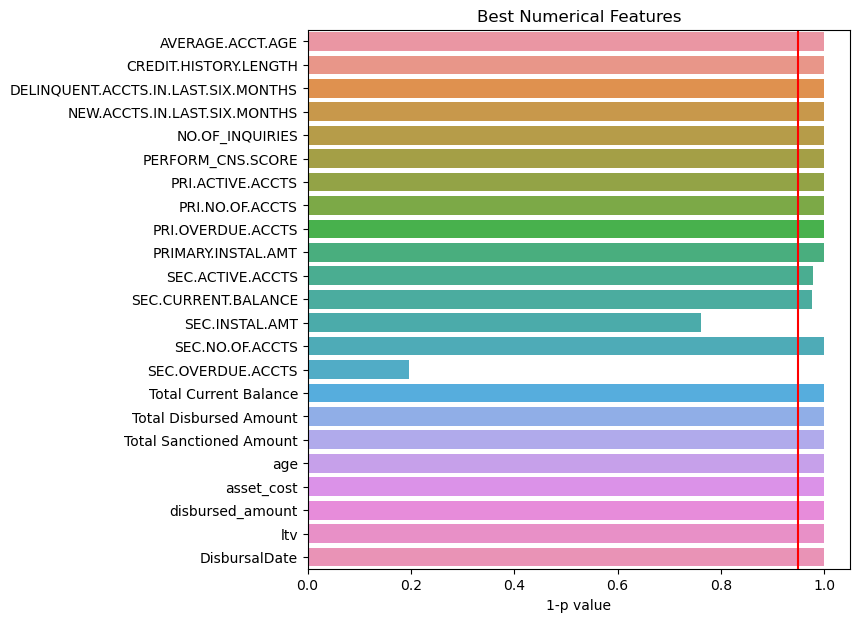

In [37]:
#T Test for numerical columns
p=[]
from scipy.stats import ttest_ind
df1=df.groupby('loan_default').get_group(0)
df2=df.groupby('loan_default').get_group(1)

for i in numerical:
    t,pvalue=ttest_ind(df1[i],df2[i])
    p.append(1-pvalue)

plt.figure(figsize=(7,7))
sns.barplot(x=p, y=numerical)
plt.title('Best Numerical Features')
plt.axvline(x=(1-0.05),color='r')
plt.xlabel('1-p value')
plt.show()

insignificant features: SEC.OVERDUE.ACCTS, sec.instal.amt

In [38]:
# df.drop(["SEC.OVERDUE.ACCTS", 'SEC.INSTAL.AMT'], axis=1, inplace = True)
df.drop(["SEC.OVERDUE.ACCTS", 'SEC.INSTAL.AMT', "SEC.CURRENT.BALANCE"], axis=1, inplace = True)

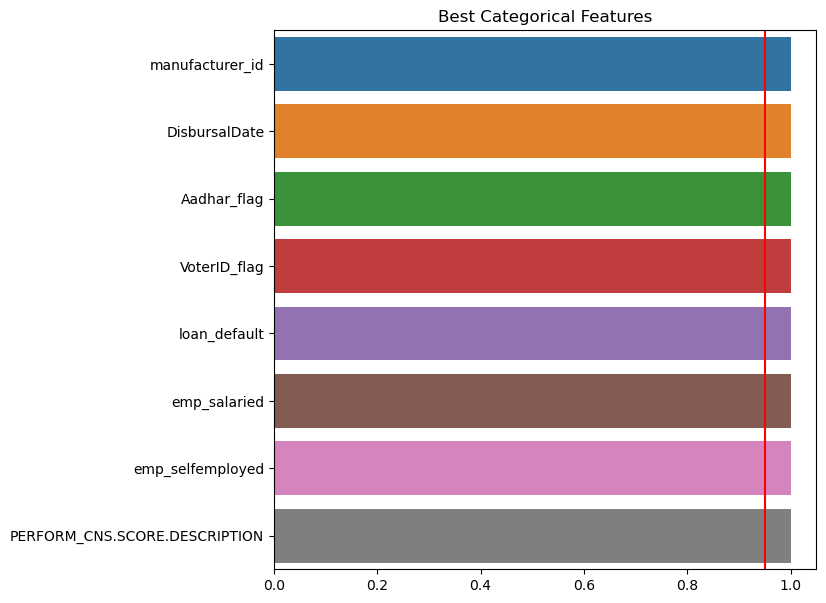

In [39]:
#Chi Square test for Categorical Columns
from scipy.stats import chi2_contingency
l=[]
for i in categorical:
    pvalue  = chi2_contingency(pd.crosstab(df['loan_default'],df[i]))[1]
    l.append(1-pvalue)
plt.figure(figsize=(7,7))
sns.barplot(x=l, y=categorical)
plt.title('Best Categorical Features')
plt.axvline(x=(1-0.05),color='r')
plt.show()

In [41]:
#SPLIT INTO TRAIN AND TEST SETS

from sklearn.model_selection import train_test_split
# select independent variables

X = df.drop(columns=['loan_default', "PERFORM_CNS.SCORE.DESCRIPTION"],axis=1).fillna(0)
y = df['loan_default']

X_train, X_validation, y_train, y_validation =\
train_test_split(X, y, test_size=0.3, random_state = 26, shuffle= True)

{'whiskers': [<matplotlib.lines.Line2D at 0x231db7f9970>,
 'caps': [<matplotlib.lines.Line2D at 0x231db7f9df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x231db7f96a0>],
 'medians': [<matplotlib.lines.Line2D at 0x231db8083d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x231db8086a0>],
 'means': []}

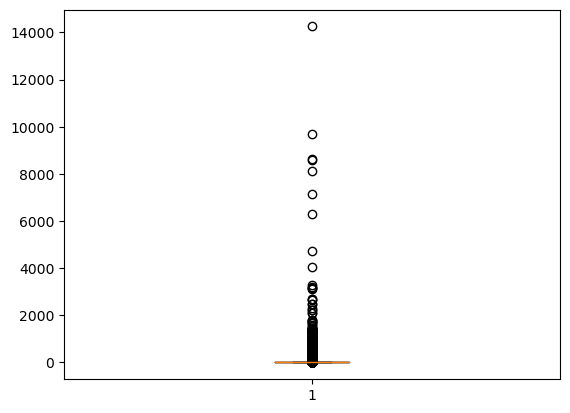

In [42]:
from sklearn.preprocessing import RobustScaler
to_transform = ['AVERAGE.ACCT.AGE',
 'CREDIT.HISTORY.LENGTH',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES',
 'PERFORM_CNS.SCORE',
 'PRI.ACTIVE.ACCTS',
 'PRI.NO.OF.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRIMARY.INSTAL.AMT',
 'SEC.ACTIVE.ACCTS',
 'SEC.NO.OF.ACCTS',
 'Total Current Balance',
 'Total Disbursed Amount',
 'Total Sanctioned Amount']
for i in to_transform:
    rs1 = RobustScaler()
    X_train[i] = rs1.fit_transform(X_train[[i]])
    rs2 = RobustScaler()
    X_validation[i] = rs2.fit_transform(X_validation[[i]])
plt.boxplot(X_train['PRIMARY.INSTAL.AMT'])


LR: 0.584309 (0.005354)
DT: 0.524834 (0.002977)
NB: 0.546548 (0.004797)
RF: 0.604539 (0.001754)
Learning rate set to 0.07941
0:	learn: 0.6632104	total: 255ms	remaining: 4m 14s
200:	learn: 0.4928622	total: 10.3s	remaining: 40.8s
400:	learn: 0.4846188	total: 18.7s	remaining: 28s
600:	learn: 0.4774796	total: 27.3s	remaining: 18.1s
800:	learn: 0.4714735	total: 36s	remaining: 8.94s
999:	learn: 0.4658382	total: 45s	remaining: 0us
Learning rate set to 0.079411
0:	learn: 0.6636290	total: 85ms	remaining: 1m 24s
200:	learn: 0.4958170	total: 12.6s	remaining: 50s
400:	learn: 0.4871235	total: 23.2s	remaining: 34.7s
600:	learn: 0.4805513	total: 34.2s	remaining: 22.7s
800:	learn: 0.4740553	total: 45s	remaining: 11.2s
999:	learn: 0.4685116	total: 55.6s	remaining: 0us
Learning rate set to 0.079411
0:	learn: 0.6637115	total: 77.5ms	remaining: 1m 17s
200:	learn: 0.4960309	total: 9.75s	remaining: 38.8s
400:	learn: 0.4874754	total: 19.9s	remaining: 29.7s
600:	learn: 0.4803125	total: 28.8s	remaining: 19.1s


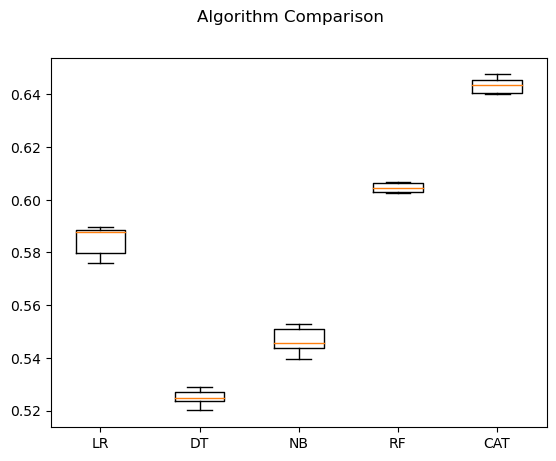

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier

###prepare models
models = []
models.append(('LR',LogisticRegression()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('NB',BernoulliNB()))
models.append(('RF',RandomForestClassifier()))
models.append(('CAT',CatBoostClassifier(verbose=200)))
###evaluate each model
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
    kfold = KFold(n_splits=5,random_state = 99,shuffle=True)
    cv_results = cross_val_score(model, X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [44]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def evaluate_model(fitted_model, name):
    prob_predictions = [item[1] for item in fitted_model.predict_proba(X_validation)]
    predictions = fitted_model.predict(X_validation)
    print("accuracy: " + str(fitted_model.score(X_validation, y_validation)))
    print("roc_auc_score: " + str(roc_auc_score(y_validation, prob_predictions)))
    plt.title(name + " Confusion Matrix")
    sns.heatmap(confusion_matrix(y_validation, predictions),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
    print(classification_report(y_validation, predictions))


In [45]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

accuracy: 0.771469204682201
roc_auc_score: 0.6002542231561226
              precision    recall  f1-score   support

           0       0.78      0.98      0.87     49962
           1       0.34      0.04      0.08     14025

    accuracy                           0.77     63987
   macro avg       0.56      0.51      0.47     63987
weighted avg       0.69      0.77      0.70     63987



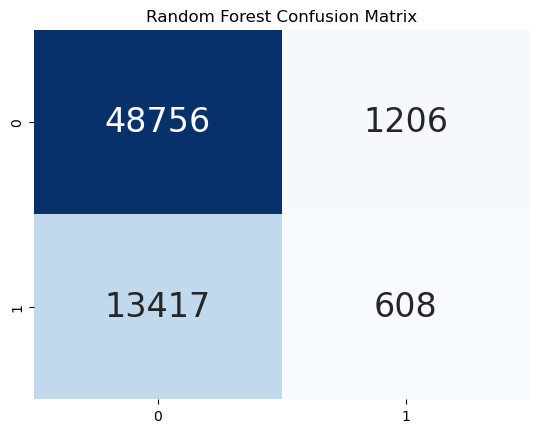

In [46]:
evaluate_model(rf_model, "Random Forest")

In [47]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

In [48]:
prob_predictions = [item[1] for item in bnb.predict_proba(X_validation)]
predictions = bnb.predict(X_validation)
print(roc_auc_score(y_validation, prob_predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.5422607142212396
[[49882    80]
 [14002    23]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     49962
           1       0.22      0.00      0.00     14025

    accuracy                           0.78     63987
   macro avg       0.50      0.50      0.44     63987
weighted avg       0.66      0.78      0.68     63987



In [49]:
from catboost import CatBoostClassifier

In [50]:
cat = CatBoostClassifier(verbose=200)
cat.fit(X_train, y_train)

Learning rate set to 0.087349
0:	learn: 0.6608544	total: 75.6ms	remaining: 1m 15s
200:	learn: 0.4959074	total: 13.7s	remaining: 54.5s
400:	learn: 0.4884069	total: 25s	remaining: 37.3s
600:	learn: 0.4822999	total: 35.5s	remaining: 23.6s
800:	learn: 0.4765989	total: 46s	remaining: 11.4s
999:	learn: 0.4714809	total: 57.1s	remaining: 0us


accuracy: 0.7808617375404379
roc_auc_score: 0.6412618509853585
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     49962
           1       0.50      0.02      0.03     14025

    accuracy                           0.78     63987
   macro avg       0.64      0.51      0.45     63987
weighted avg       0.72      0.78      0.69     63987



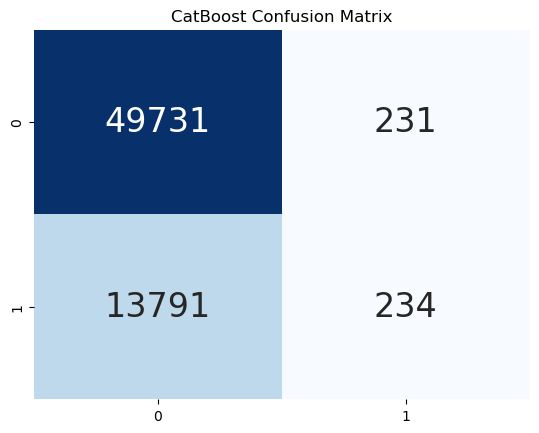

In [51]:
evaluate_model(cat, "CatBoost")


In [52]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit.score(X_validation, y_validation)

0.7806585712722897

In [53]:
import statsmodels.api as sm
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.511597
         Iterations 6


In [54]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:           loan_default   No. Observations:               149301
Model:                          Logit   Df Residuals:                   149276
Method:                           MLE   Df Model:                           24
Date:                Sat, 18 Mar 2023   Pseudo R-squ.:                 0.02786
Time:                        20:42:29   Log-Likelihood:                -76382.
converged:                       True   LL-Null:                       -78571.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
disbursed_amount                     4.916e-05   1.62e-06     30.259      0.000     4.6e-05    5.23e-05
asset_cost                          -2.857e-05   1.04e-0

accuracy: 0.7806585712722897
roc_auc_score: 0.5873374238574613
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     49962
           1       0.19      0.00      0.00     14025

    accuracy                           0.78     63987
   macro avg       0.48      0.50      0.44     63987
weighted avg       0.65      0.78      0.68     63987



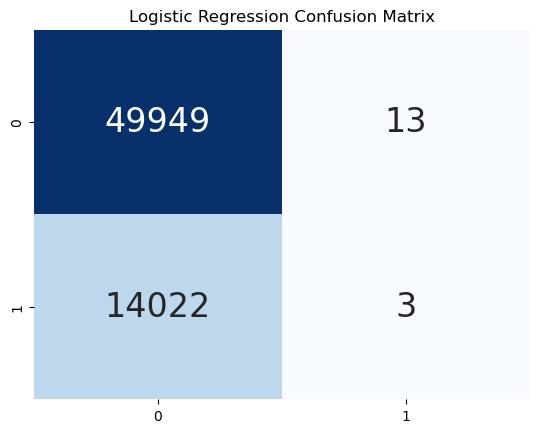

In [55]:
evaluate_model(logit, "Logistic Regression")

accuracy: 0.7799240470720615
roc_auc_score: 0.5422607142212396
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     49962
           1       0.22      0.00      0.00     14025

    accuracy                           0.78     63987
   macro avg       0.50      0.50      0.44     63987
weighted avg       0.66      0.78      0.68     63987



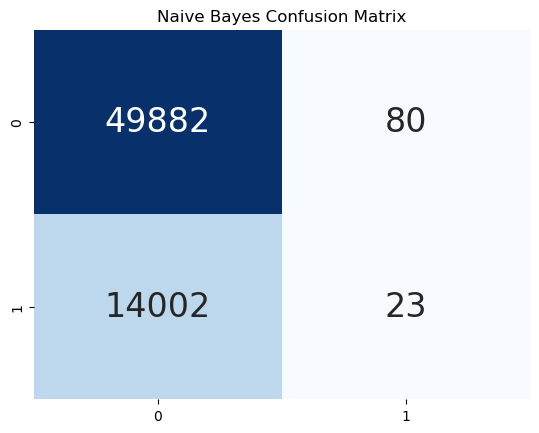

In [56]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
evaluate_model(nb, "Naive Bayes")

accuracy: 0.6622595214652977
roc_auc_score: 0.5217195214530601
              precision    recall  f1-score   support

           0       0.79      0.77      0.78     49962
           1       0.25      0.27      0.26     14025

    accuracy                           0.66     63987
   macro avg       0.52      0.52      0.52     63987
weighted avg       0.67      0.66      0.67     63987



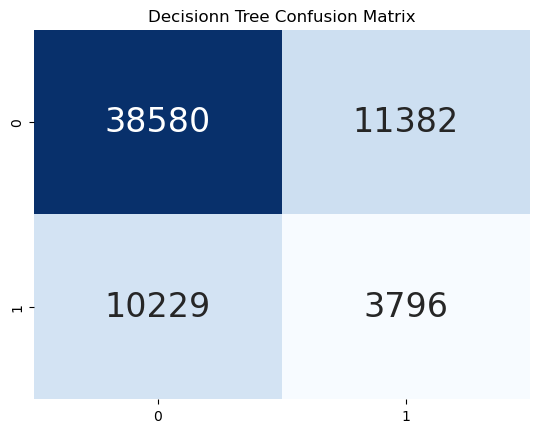

In [57]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
evaluate_model(dt, "Decisionn Tree")